In [1]:
from pprint import pprint

In [2]:
import os
import pandas as pd
directory = "C:\\Users\\Mahmuud\\Documents\\Spotify Project"
json_files = [filename for filename in os.listdir(directory) if filename.startswith("Streaming_History_Audio") and filename.endswith(".json")]
data_list = []
for json_file in json_files:
    json_path = os.path.join(directory, json_file)
    data = pd.read_json(json_path)
    data_list.append(data)
df = pd.concat(data_list, ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139573 entries, 0 to 139572
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   ts                                 139573 non-null  object
 1   username                           139573 non-null  int64 
 2   platform                           139573 non-null  object
 3   ms_played                          139573 non-null  int64 
 4   conn_country                       139573 non-null  object
 5   ip_addr_decrypted                  139573 non-null  object
 6   user_agent_decrypted               138263 non-null  object
 7   master_metadata_track_name         139339 non-null  object
 8   master_metadata_album_artist_name  139339 non-null  object
 9   master_metadata_album_album_name   139339 non-null  object
 10  spotify_track_uri                  139339 non-null  object
 11  episode_name                       44 non-null      

In [3]:
df.isnull().sum()

ts                                        0
username                                  0
platform                                  0
ms_played                                 0
conn_country                              0
ip_addr_decrypted                         0
user_agent_decrypted                   1310
master_metadata_track_name              234
master_metadata_album_artist_name       234
master_metadata_album_album_name        234
spotify_track_uri                       234
episode_name                         139529
episode_show_name                    139529
spotify_episode_uri                  139529
reason_start                              0
reason_end                                0
shuffle                                   0
skipped                               86581
offline                                   0
offline_timestamp                         0
incognito_mode                            0
dtype: int64

In [4]:
df = df.drop(columns=["episode_name","episode_show_name","spotify_episode_uri"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139573 entries, 0 to 139572
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   ts                                 139573 non-null  object
 1   username                           139573 non-null  int64 
 2   platform                           139573 non-null  object
 3   ms_played                          139573 non-null  int64 
 4   conn_country                       139573 non-null  object
 5   ip_addr_decrypted                  139573 non-null  object
 6   user_agent_decrypted               138263 non-null  object
 7   master_metadata_track_name         139339 non-null  object
 8   master_metadata_album_artist_name  139339 non-null  object
 9   master_metadata_album_album_name   139339 non-null  object
 10  spotify_track_uri                  139339 non-null  object
 11  reason_start                       139573 non-null  

In [5]:
df.isnull().sum()

ts                                       0
username                                 0
platform                                 0
ms_played                                0
conn_country                             0
ip_addr_decrypted                        0
user_agent_decrypted                  1310
master_metadata_track_name             234
master_metadata_album_artist_name      234
master_metadata_album_album_name       234
spotify_track_uri                      234
reason_start                             0
reason_end                               0
shuffle                                  0
skipped                              86581
offline                                  0
offline_timestamp                        0
incognito_mode                           0
dtype: int64

In [6]:
# List of columns with null values
columns_with_null = ['master_metadata_track_name', 'master_metadata_album_artist_name', 'master_metadata_album_album_name', 'spotify_track_uri']

# Create a new DataFrame containing only the rows with null entries in the specified columns
df_with_null = df[df[columns_with_null].isnull().any(axis=1)]

# Now you have a new DataFrame 'df_with_null' containing entries with null values
df_with_null

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
105,2013-05-05T03:32:18Z,1246157207,Unknown Windows SP0 [x86 0],99761,US,108.214.41.13,unknown,None,None,None,None,trackdone,popup,False,True,False,0,False
258,2013-05-08T02:44:00Z,1246157207,Unknown Windows SP0 [x86 0],6504,US,108.214.41.13,unknown,None,None,None,None,unknown,unknown,False,True,False,0,False
306,2013-05-09T02:08:48Z,1246157207,Unknown Windows SP0 [x86 0],8855,US,108.214.41.13,unknown,None,None,None,None,unknown,unknown,False,True,False,0,False
307,2013-05-09T02:10:43Z,1246157207,Unknown Windows SP0 [x86 0],115539,US,108.214.41.13,unknown,None,None,None,None,unknown,trackdone,False,False,False,0,False
308,2013-05-09T02:14:31Z,1246157207,Unknown Windows SP0 [x86 0],227317,US,108.214.41.13,unknown,None,None,None,None,trackdone,trackdone,False,False,False,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126579,2022-06-09T16:12:12Z,1246157207,"iOS 15.5 (iPhone14,2)",146410,US,131.96.220.63,unknown,None,None,None,None,appload,endplay,False,NaN,False,1654779564552,False
130322,2022-09-02T16:44:38Z,1246157207,web_player windows 10;firefox 104.0;desktop,61327,US,68.77.250.204,None,None,None,None,None,remote,logout,False,NaN,False,0,False
130338,2022-09-02T18:45:27Z,1246157207,web_player windows 10;firefox 104.0;desktop,115506,US,68.77.250.204,None,None,None,None,None,remote,logout,False,NaN,False,0,False
133182,2022-11-15T22:05:36Z,1246157207,windows,345065,US,68.77.250.204,Mozilla%2F5.0%20(Windows%20NT%2010.0;%20Win64;...,None,None,None,None,remote,endplay,False,1.0,False,0,False


In [7]:
df_with_null.describe()

,username,ms_played,offline_timestamp
count,2.340000e+02,2.340000e+02,2.340000e+02
mean,1.246157e+09,1.810981e+05,2.674603e+11
std,0.000000e+00,4.907343e+05,5.994184e+11
min,1.246157e+09,1.175000e+03,0.000000e+00
25%,1.246157e+09,3.467500e+03,0.000000e+00
50%,1.246157e+09,2.543050e+04,0.000000e+00
75%,1.246157e+09,1.835425e+05,0.000000e+00
max,1.246157e+09,4.169045e+06,1.654780e+12


In [8]:
df_with_null=df_with_null.drop(columns=["username"])
df_with_null.describe()

,ms_played,offline_timestamp
count,2.340000e+02,2.340000e+02
mean,1.810981e+05,2.674603e+11
std,4.907343e+05,5.994184e+11
min,1.175000e+03,0.000000e+00
25%,3.467500e+03,0.000000e+00
50%,2.543050e+04,0.000000e+00
75%,1.835425e+05,0.000000e+00
max,4.169045e+06,1.654780e+12


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139573 entries, 0 to 139572
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   ts                                 139573 non-null  object
 1   username                           139573 non-null  int64 
 2   platform                           139573 non-null  object
 3   ms_played                          139573 non-null  int64 
 4   conn_country                       139573 non-null  object
 5   ip_addr_decrypted                  139573 non-null  object
 6   user_agent_decrypted               138263 non-null  object
 7   master_metadata_track_name         139339 non-null  object
 8   master_metadata_album_artist_name  139339 non-null  object
 9   master_metadata_album_album_name   139339 non-null  object
 10  spotify_track_uri                  139339 non-null  object
 11  reason_start                       139573 non-null  

In [10]:
df["username"].unique()

array([1246157207], dtype=int64)

In [11]:
df["reason_start"].unique()

array(['', 'trackdone', 'backbtn', 'fwdbtn', 'unknown', 'popup',
       'clickrow', 'uriopen', 'playbtn', 'appload', 'remote',
       'trackerror', 'clickside', 'endplay'], dtype=object)

In [12]:
df["reason_end"].unique()

array(['', 'trackdone', 'backbtn', 'fwdbtn', 'endplay', 'unknown',
       'popup', 'clickrow', 'uriopen', 'remote', 'clickside', 'appload',
       'trackerror', 'logout', 'unexpected-exit-while-paused',
       'unexpected-exit'], dtype=object)

In [13]:
for column in df:
    pprint(df[column].unique())

array(['2012-08-31T17:21:11Z', '2012-08-31T17:30:20Z',
       '2012-08-31T17:31:17Z', ..., '2023-07-31T21:18:27Z',
       '2023-07-31T21:18:33Z', '2023-07-31T21:19:07Z'], dtype=object)
array([1246157207], dtype=int64)
array(['iOS 5.1.1 (iPhone3,3)', 'Unknown Windows SP0 [x86 0]',
       'Windows 8 (6.2.9200; x86)', 'WebPlayer (websocket RFC6455)',
       'Windows 7 (6.1.7601; x64; SP1; S)', 'iOS 7.0.4 (iPhone3,1)',
       'Windows 8 (6.2.9200; x64)', 'iOS 7.1 (iPhone3,1)',
       'Android OS 4.1.2 API 16 (LGE, LGMS500)',
       'Android OS 4.4.2 API 19 (samsung, SM-G386T1)',
       'Windows 7 (6.1.7601; x86; SP1; S)', 'Windows 8.1 (6.3.9600; x64)',
       'Windows 10 (10.0.10240; x64)', 'Windows 10 (10.0.10586; x64)',
       'Android OS 5.0 API 21 (samsung, SM-G900V)',
       'Windows 10 (10.0.14393; x64)',
       'Android OS 6.0.1 API 23 (samsung, SM-G930P)',
       'Android OS 7.0 API 24 (samsung, SM-G930P)',
       'Windows 10 (10.0.15063; x64)', 'Partner SCEI sony_tv;ps4;;',
      

array(["Kickin' & Screamin'",
       "Queen 40 Limited Edition Collector's Box Set Vol. 2",
       "Queen 40 Limited Edition Collector's Box Set", ...,
       'Straight North', 'Basement Songs', 'Icarus the Owl'], dtype=object)
array(['spotify:track:3eMfBkKz0ZuffMqIVHhNr1',
       'spotify:track:44eZ0RG3gWBfiD5o9pvIV9',
       'spotify:track:0uQWGMWQAtpISoXTEi5as6', ...,
       'spotify:track:3ub5KhKyPgGROItcZgQf1o',
       'spotify:track:6ljnm3mEA1vzcRjwydZonk',
       'spotify:track:0wWtrTfTPmdT41WzzvCjhc'], dtype=object)
array(['', 'trackdone', 'backbtn', 'fwdbtn', 'unknown', 'popup',
       'clickrow', 'uriopen', 'playbtn', 'appload', 'remote',
       'trackerror', 'clickside', 'endplay'], dtype=object)
array(['', 'trackdone', 'backbtn', 'fwdbtn', 'endplay', 'unknown',
       'popup', 'clickrow', 'uriopen', 'remote', 'clickside', 'appload',
       'trackerror', 'logout', 'unexpected-exit-while-paused',
       'unexpected-exit'], dtype=object)
array([False,  True])
array([True, Fals

In [14]:
df.describe()

,username,ms_played,offline_timestamp
count,1.395730e+05,1.395730e+05,1.395730e+05
mean,1.246157e+09,1.386217e+05,8.263994e+11
std,0.000000e+00,1.026609e+05,7.846906e+11
min,1.246157e+09,0.000000e+00,0.000000e+00
25%,1.246157e+09,1.662600e+04,0.000000e+00
50%,1.246157e+09,1.730900e+05,1.488399e+12
75%,1.246157e+09,2.136930e+05,1.570204e+12
max,1.246157e+09,4.169045e+06,1.665791e+12


In [15]:
# Convert ms_played to seconds and create a new column 'seconds_played'
df['seconds_played'] = df['ms_played'] / 1000

In [16]:
df

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode,seconds_played
0,2012-08-31T17:21:11Z,1246157207,"iOS 5.1.1 (iPhone3,3)",21966,US,174.229.2.243,unknown,Kill Shit,Krizz Kaliko,Kickin' & Screamin',spotify:track:3eMfBkKz0ZuffMqIVHhNr1,,,False,True,False,0,False,21.966
1,2012-08-31T17:30:20Z,1246157207,"iOS 5.1.1 (iPhone3,3)",454489,US,174.229.2.243,unknown,Mayday,Krizz Kaliko,Kickin' & Screamin',spotify:track:44eZ0RG3gWBfiD5o9pvIV9,,trackdone,False,False,False,0,False,454.489
2,2012-08-31T17:31:17Z,1246157207,"iOS 5.1.1 (iPhone3,3)",59112,US,174.229.2.243,unknown,Dumb For You,Krizz Kaliko,Kickin' & Screamin',spotify:track:0uQWGMWQAtpISoXTEi5as6,trackdone,backbtn,False,True,False,0,False,59.112
3,2012-08-31T17:35:54Z,1246157207,"iOS 5.1.1 (iPhone3,3)",261453,US,174.229.2.243,unknown,Mayday,Krizz Kaliko,Kickin' & Screamin',spotify:track:44eZ0RG3gWBfiD5o9pvIV9,backbtn,trackdone,False,False,False,0,False,261.453
4,2012-08-31T17:36:17Z,1246157207,"iOS 5.1.1 (iPhone3,3)",22923,US,174.229.2.243,unknown,Dumb For You,Krizz Kaliko,Kickin' & Screamin',spotify:track:0uQWGMWQAtpISoXTEi5as6,trackdone,backbtn,False,True,False,0,False,22.923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139568,2023-07-31T21:18:24Z,1246157207,ios,5210,US,131.96.220.214,unknown,Vampire,Brooklane,Vampire,spotify:track:6ljnm3mEA1vzcRjwydZonk,playbtn,endplay,False,1.0,False,1690838299,False,5.210
139569,2023-07-31T21:18:26Z,1246157207,ios,1540,US,131.96.220.214,unknown,Catalina Fight Song,Joyce Manor,Never Hungover Again,spotify:track:2TqfK2N1kFoX7OySPCB7pQ,clickrow,endplay,False,1.0,False,1690838305,False,1.540
139570,2023-07-31T21:18:27Z,1246157207,ios,1050,US,131.96.220.214,unknown,What's Up?,Mom Jeans.,Sweet Tooth,spotify:track:141alNiSd9vG4Lb22BLHWM,clickrow,endplay,False,1.0,False,1690838306,False,1.050
139571,2023-07-31T21:18:33Z,1246157207,ios,6950,US,131.96.220.214,unknown,"Thinking of You,",Microwave,Split,spotify:track:0wWtrTfTPmdT41WzzvCjhc,clickrow,endplay,False,1.0,False,1690838307,False,6.950


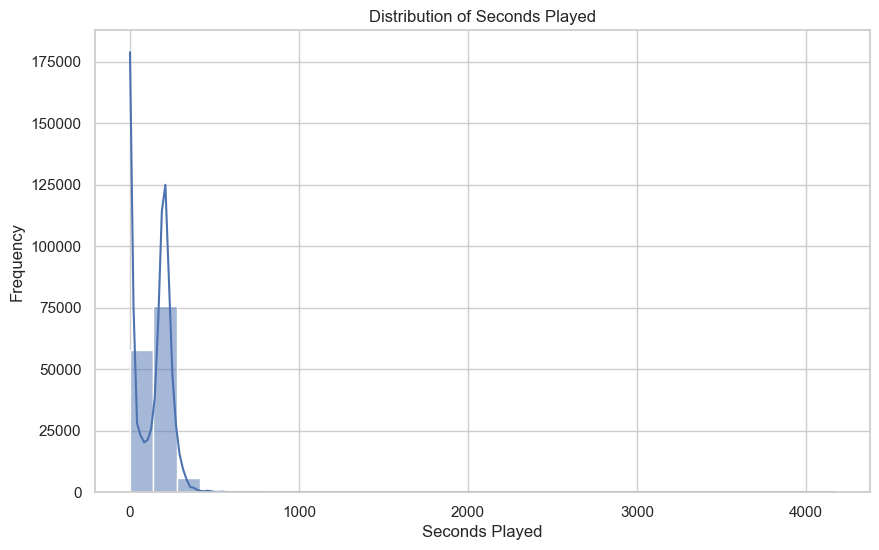

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for Seaborn plots
sns.set(style="whitegrid")

# Create a histogram of seconds_played
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='seconds_played', bins=30, kde=True)
plt.title('Distribution of Seconds Played')
plt.xlabel('Seconds Played')
plt.ylabel('Frequency')
plt.show()


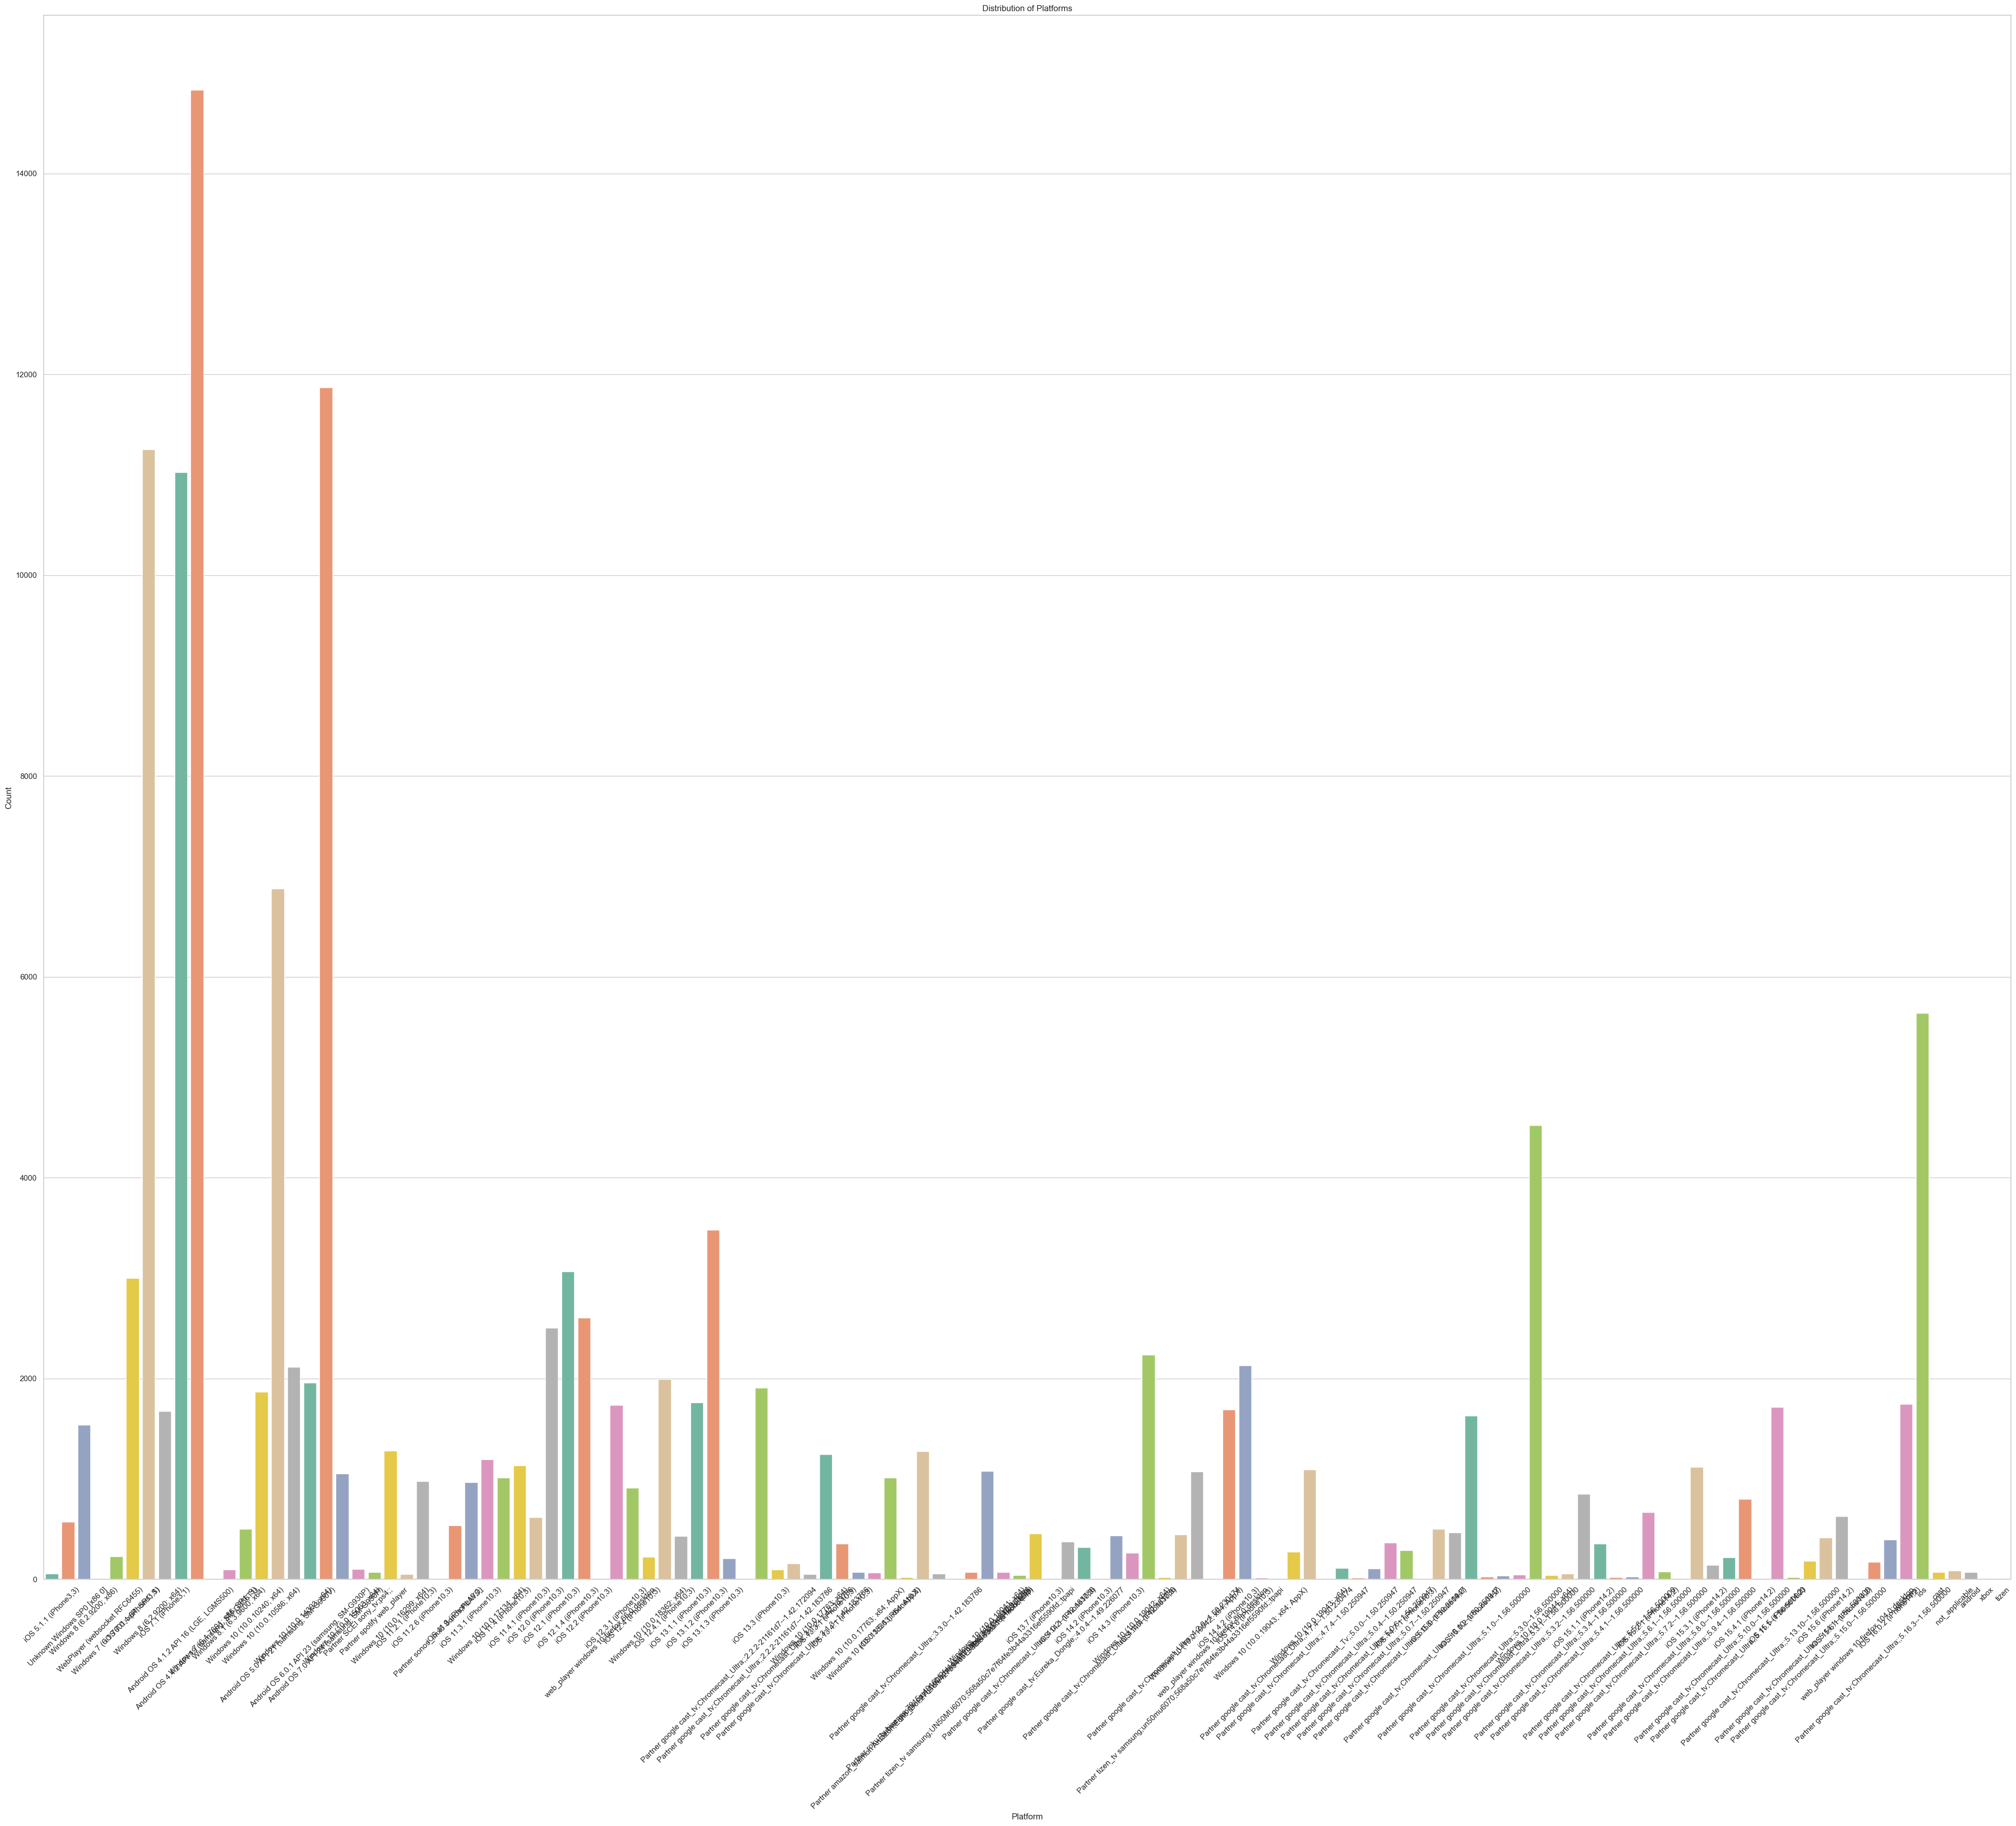

In [22]:
plt.figure(figsize=(50, 40))
sns.countplot(data=df, x='platform', palette='Set2')
plt.title('Distribution of Platforms')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

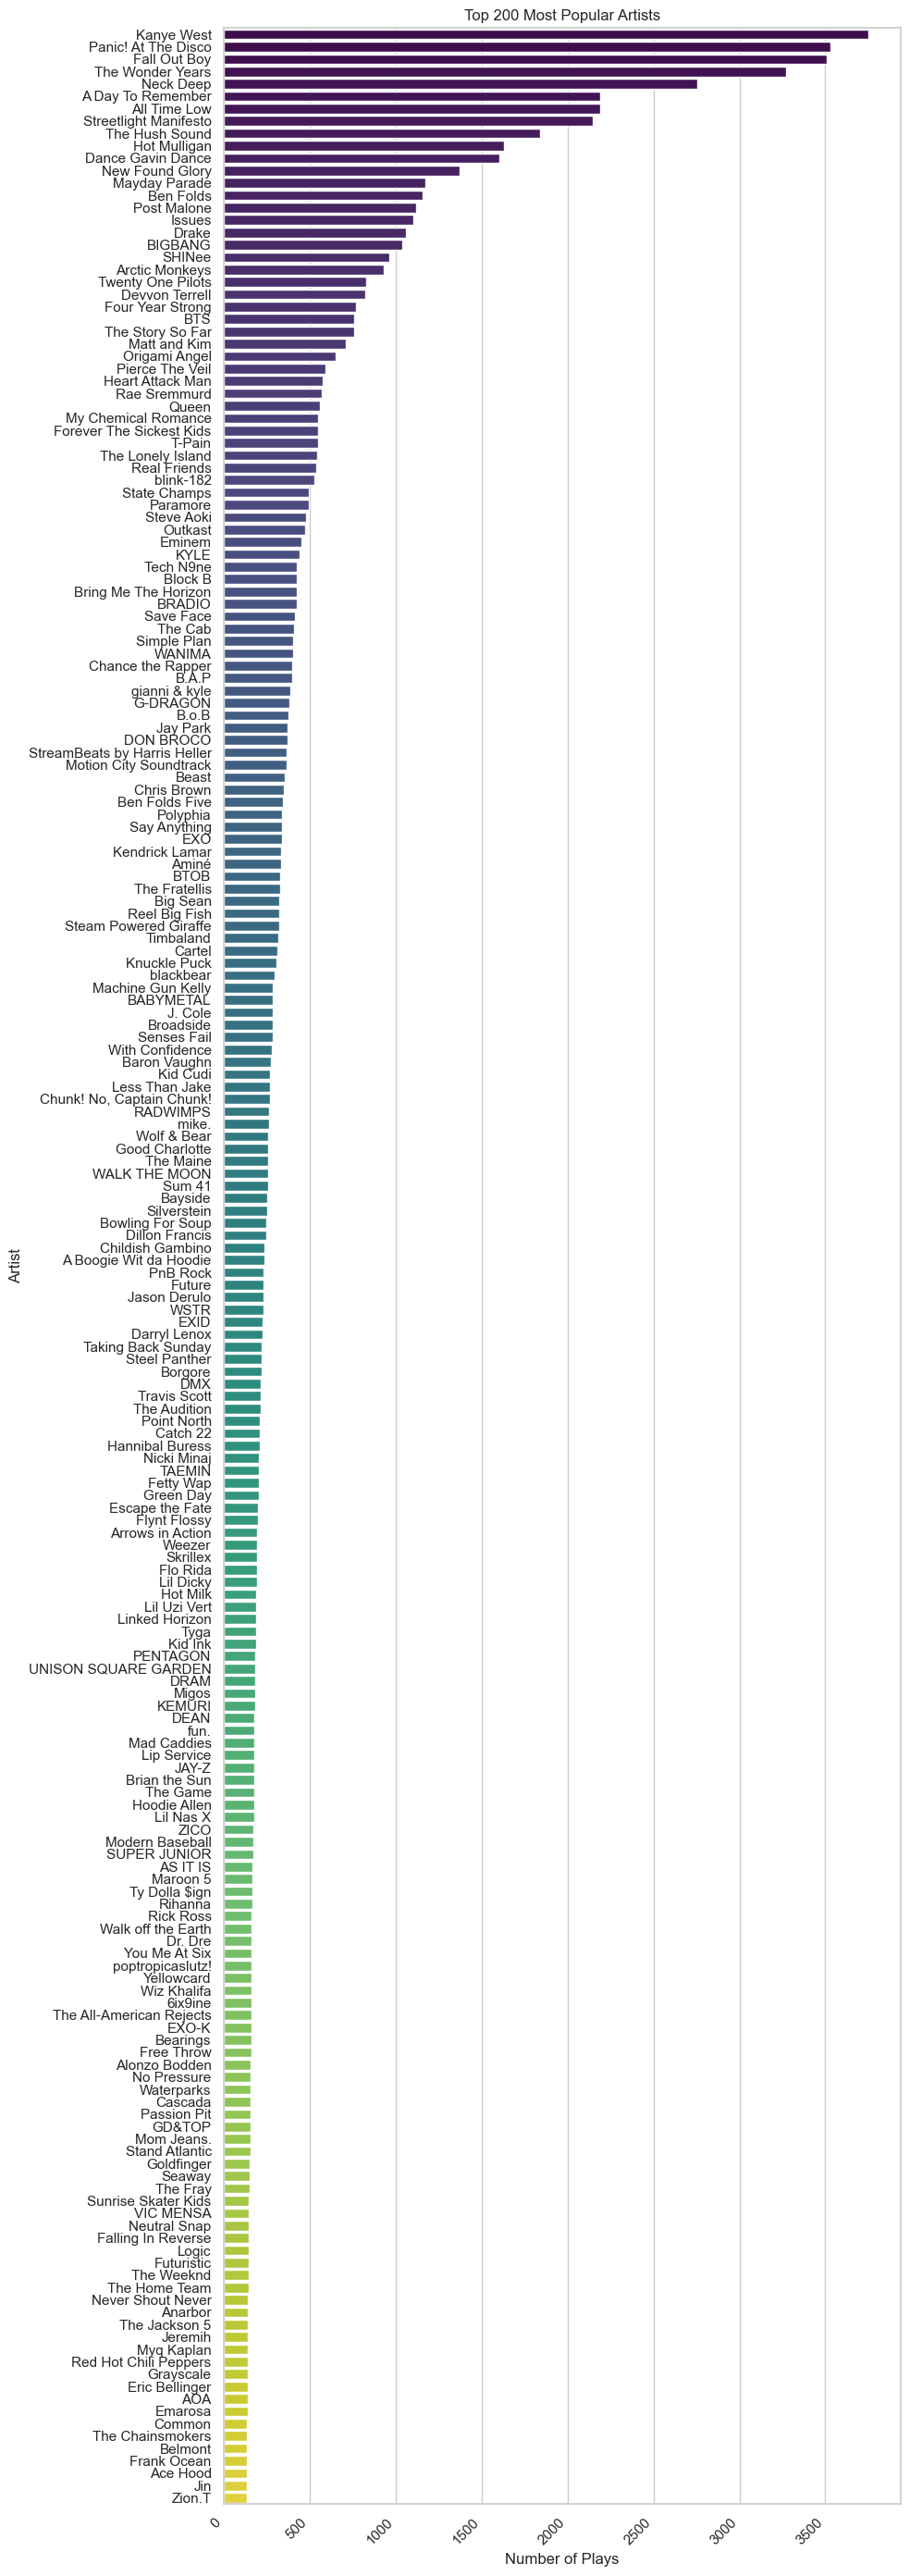

In [23]:
# Get the top N most popular artists
top_artists = df['master_metadata_album_artist_name'].value_counts().head(200)

# Increase the figure size and adjust margins
plt.figure(figsize=(10, 28))
sns.set(style="whitegrid")
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')

# Add title and labels
plt.title(f'Top 200 Most Popular Artists')
plt.xlabel('Number of Plays')
plt.ylabel('Artist')

# Rotate artist labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust the layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()



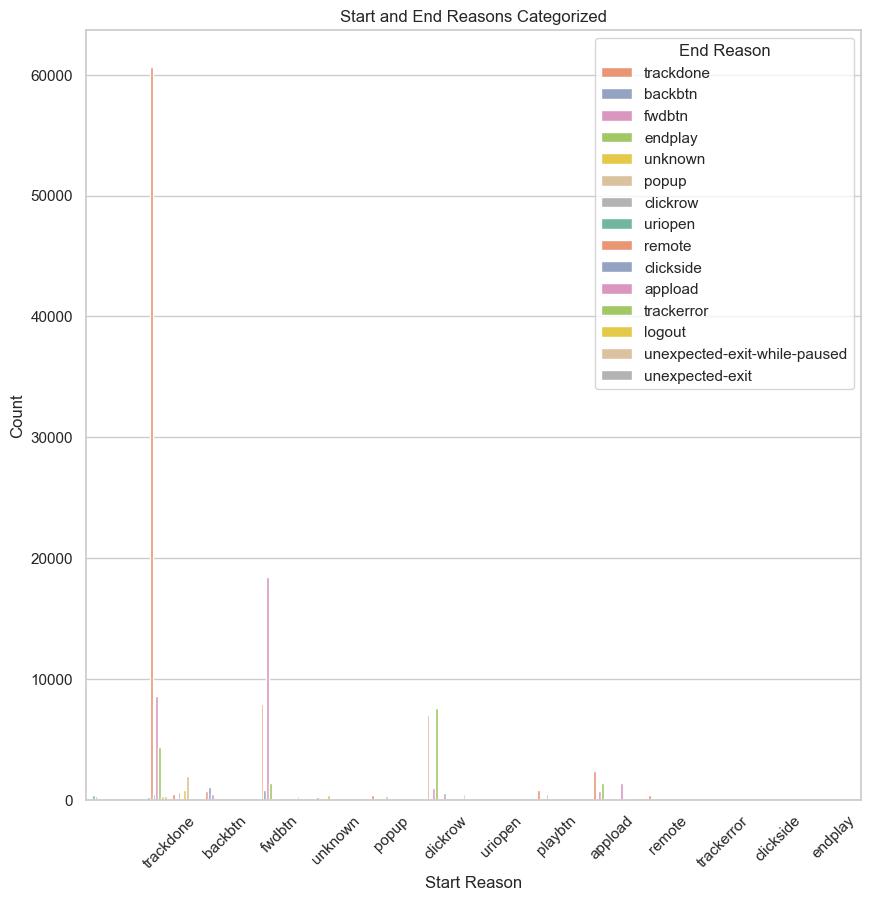

In [24]:
plt.figure(figsize=(10, 10))
sns.countplot(data=df, x='reason_start', hue='reason_end', palette='Set2')
plt.title('Start and End Reasons Categorized')
plt.xlabel('Start Reason')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='End Reason')
plt.show()

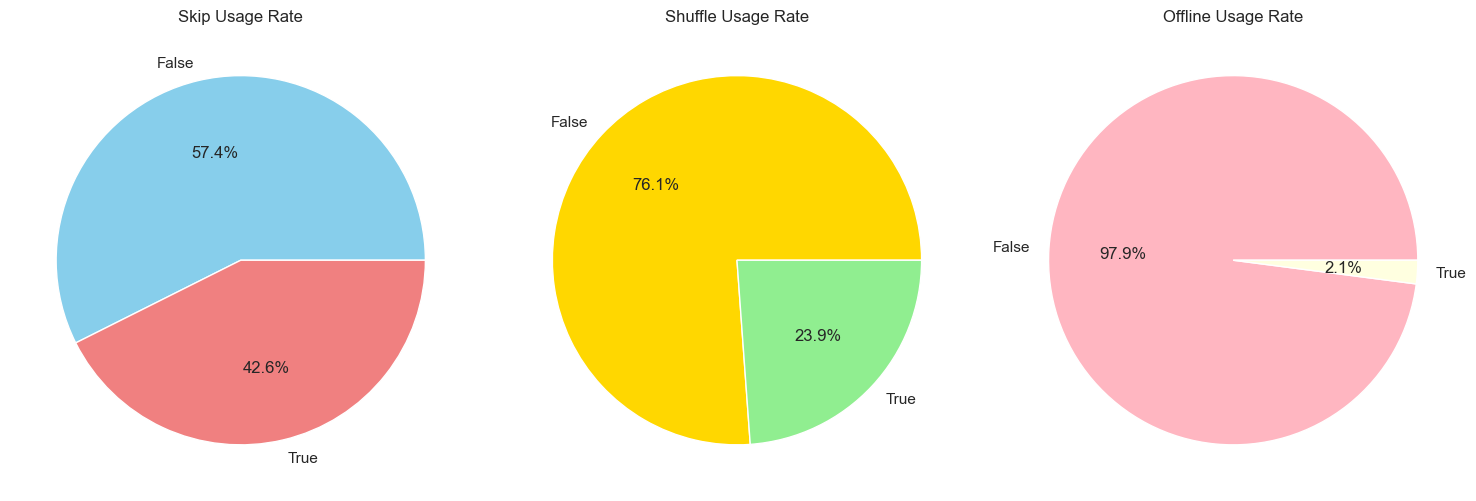

In [25]:
# Calculate usage rates
skip_rate = df['skipped'].value_counts(normalize=True) * 100
shuffle_rate = df['shuffle'].value_counts(normalize=True) * 100
offline_rate = df['offline'].value_counts(normalize=True) * 100

# Create pie charts
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].pie(skip_rate, labels=skip_rate.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
axes[0].set_title('Skip Usage Rate')
axes[1].pie(shuffle_rate, labels=shuffle_rate.index, autopct='%1.1f%%', colors=['gold', 'lightgreen'])
axes[1].set_title('Shuffle Usage Rate')
axes[2].pie(offline_rate, labels=offline_rate.index, autopct='%1.1f%%', colors=['lightpink', 'lightyellow'])
axes[2].set_title('Offline Usage Rate')
plt.tight_layout()
plt.show()


C:\Users\Mahmuud\AppData\Local\Temp\ipykernel_3580\389239705.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  stream_count_by_month = df.groupby(df['ts'].dt.to_period('M').dt.to_timestamp()).size()


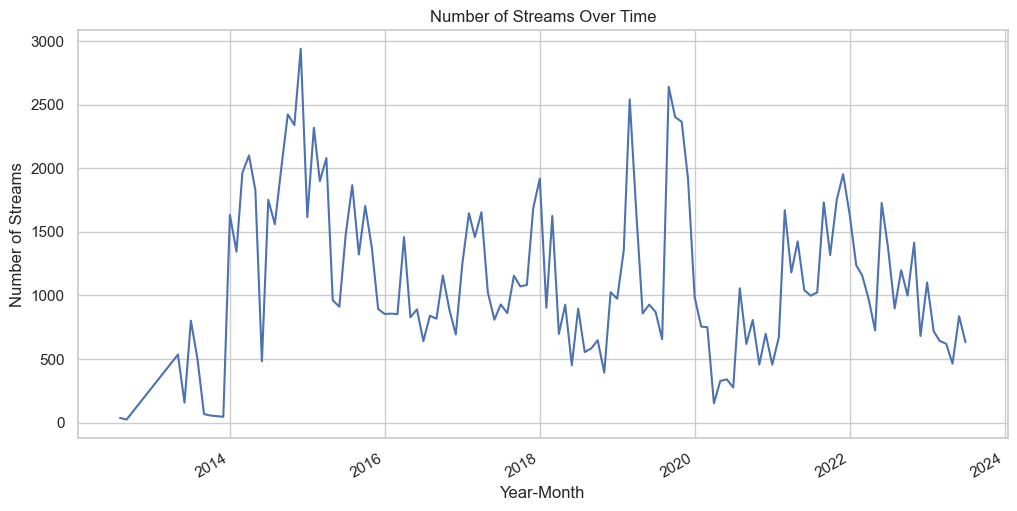

In [26]:
# Convert 'ts' to datetime
df['ts'] = pd.to_datetime(df['ts'])

# Group data by year-month and count the number of streams
stream_count_by_month = df.groupby(df['ts'].dt.to_period('M').dt.to_timestamp()).size()

# Create a line plot
plt.figure(figsize=(12, 6))
stream_count_by_month.plot(kind='line')
plt.title('Number of Streams Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Streams')
plt.show()


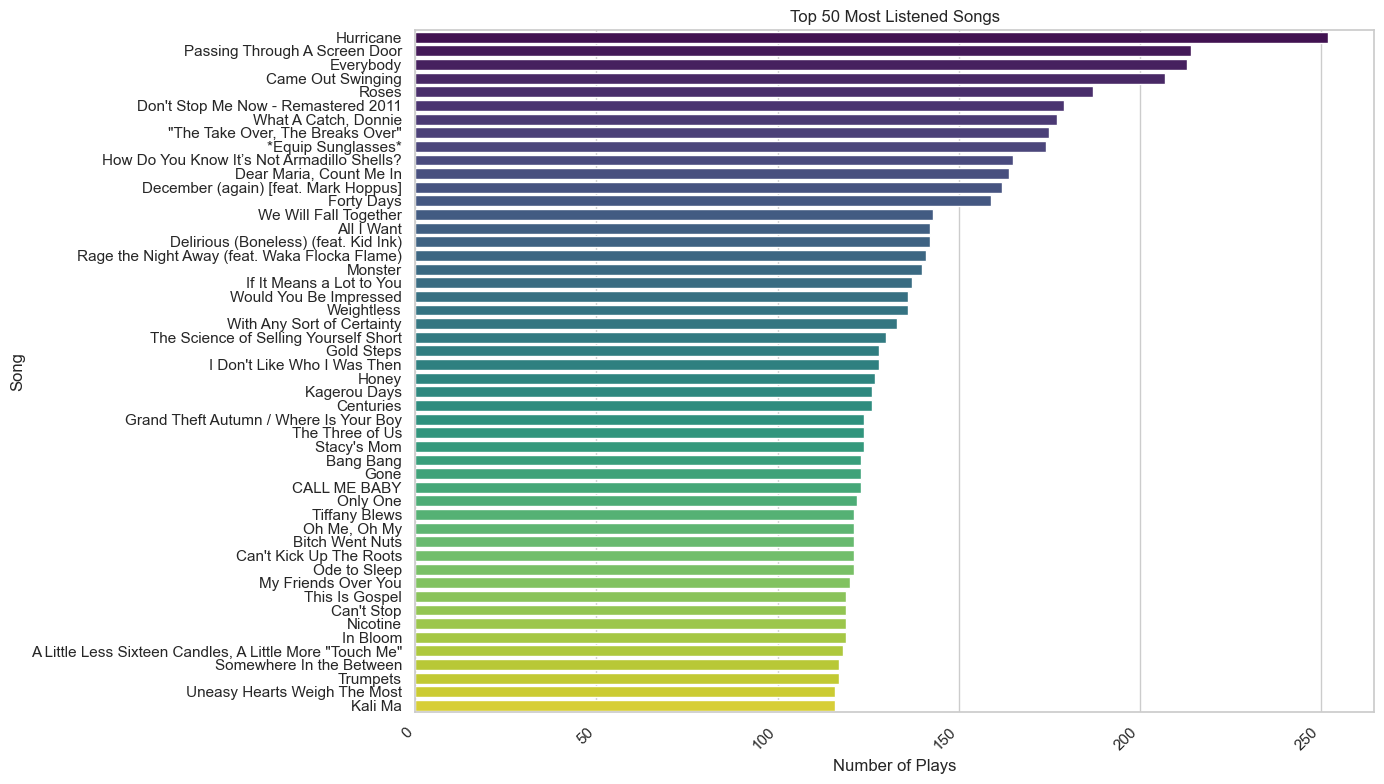

In [27]:
# Get the top 50 most listened songs
top_songs = df['master_metadata_track_name'].value_counts().head(50)

# Create a bar plot for top songs
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")
sns.barplot(x=top_songs.values, y=top_songs.index, palette='viridis')

# Add title and labels
plt.title('Top 50 Most Listened Songs')
plt.xlabel('Number of Plays')
plt.ylabel('Song')

# Rotate song labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust the layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()


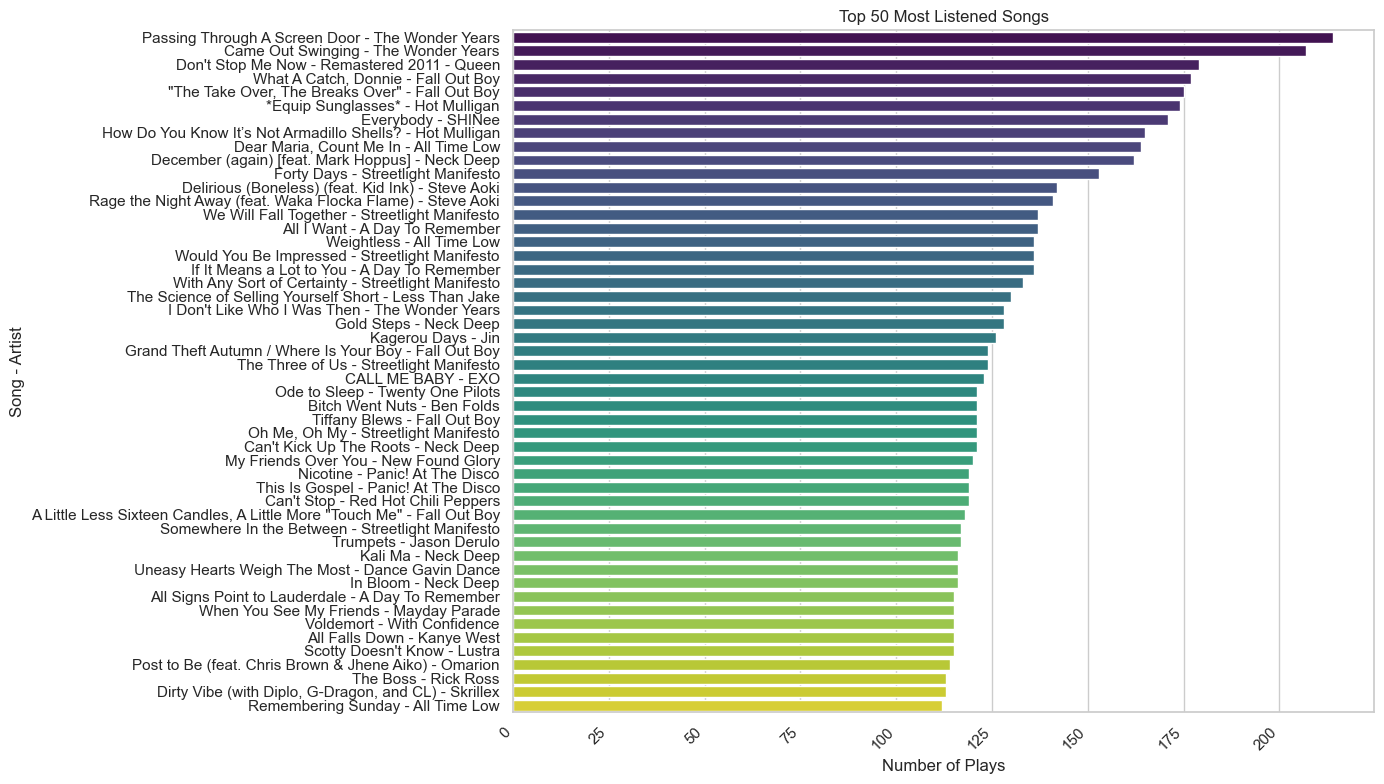

In [28]:
# Create a new column combining song name and artist name
df['song_artist'] = df['master_metadata_track_name'] + ' - ' + df['master_metadata_album_artist_name']

# Get the top 50 most listened songs
top_songs = df['song_artist'].value_counts().head(50)

# Create a bar plot for top songs
plt.figure(figsize=(14,8))
sns.set(style="whitegrid")
sns.barplot(x=top_songs.values, y=top_songs.index, palette='viridis')

# Add title and labels
plt.title('Top 50 Most Listened Songs')
plt.xlabel('Number of Plays')
plt.ylabel('Song - Artist')

# Rotate song labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust the layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()


In [29]:
top_songs

Passing Through A Screen Door - The Wonder Years                          214
Came Out Swinging - The Wonder Years                                      207
Don't Stop Me Now - Remastered 2011 - Queen                               179
What A Catch, Donnie - Fall Out Boy                                       177
"The Take Over, The Breaks Over" - Fall Out Boy                           175
*Equip Sunglasses* - Hot Mulligan                                         174
Everybody - SHINee                                                        171
How Do You Know It’s Not Armadillo Shells? - Hot Mulligan                 165
Dear Maria, Count Me In - All Time Low                                    164
December (again) [feat. Mark Hoppus] - Neck Deep                          162
Forty Days - Streetlight Manifesto                                        153
Delirious (Boneless) (feat. Kid Ink) - Steve Aoki                         142
Rage the Night Away (feat. Waka Flocka Flame) - Steve Aoki      

In [30]:
df['song_artist'].value_counts()

Passing Through A Screen Door - The Wonder Years    214
Came Out Swinging - The Wonder Years                207
Don't Stop Me Now - Remastered 2011 - Queen         179
What A Catch, Donnie - Fall Out Boy                 177
"The Take Over, The Breaks Over" - Fall Out Boy     175
                                                   ... 
Wide Eyes - Local Natives                             1
It's A Trip! - Joywave                                1
One Foot - WALK THE MOON                              1
The Remains of Rock & Roll - Broken Bells             1
Thinking of You, - Microwave                          1
Name: song_artist, Length: 22848, dtype: int64